<a href="https://colab.research.google.com/github/AdrieonK/Bioinformatics-Data-Science/blob/main/genomic_data_science_specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generate a random string of nucleotide bases of 'n' length and assign to a variable

import random

seq = ''.join([random.choice('ACGT') for _ in range(50)])

print(seq)
print("Length of sequence: ", len(seq))

CGCCCACCTACTGTTAGAGATACGCTCTCCTACAAATACTCTAGGCGGGG
Length of sequence:  50


In [ ]:
# Prefix/Suffix (i.e. start/stop codon)

start_codon = seq[:3]

stop_codon = seq[-3:]


print(start_codon, stop_codon)

CGC GGG


In [ ]:
# Longest common prefix b/w 2 strings; define function and how to call it; create index (i) & start position; define loop parameters; define task & return

def longest_common_prefix (s1, s2):
  i=0
  while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
    i += 1
  return s1[:i]
longest_common_prefix('ACCCA', 'ACCAGTCGAG')

'ACC'

In [ ]:
# Do 2 strings match; Boolean
s1 = ''
s2 = ''


s1 == s2




True

In [ ]:
pip install Biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 46.2 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

def reverse_complement(s):
  complement = {
    'A':'T',
    'T':'A',
    'G':'C',
    'C':'G'}
  t = ''
  for base in s:
    t = complement[base] + t
  return t
print("reverse complement sequence: ", reverse_complement('ATTTGCCGGAAAAA'))

reverse complement sequence:  TTTTTCCGGCAAAT


#**Download & Parse FASTA file**

In [ ]:
#from url

!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2024-08-06 18:56:26--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.192.55, 13.32.192.185, 13.32.192.207, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.192.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.002s  

2024-08-06 18:56:26 (19.6 MB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [ ]:
# Read genome from FASTA file

def read_genome(filename):
  genome = '' #genome is a string; starts empty
  with open (filename, 'r') as f: #open for reading; handle/call file with 'f'
    for line in f: #loop through file and store lines as 'line'
      if not line[0] == '>': #ignore 1st line of file based on reading the first position; if not '>' then its the seq add to genome str
        genome += line.rstrip() #add to genome str; trim white space
  return genome


genome = read_genome('/content/lambda_virus.fa')
genome_length = len(genome)
print("Length of genome: ", genome_length)
genome[:100] #1st 100 bases of genome


Length of genome:  48502


'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [ ]:
#Base Frequency

counts = {'A':0, 'T':0, 'G':0, 'C':0} #set initial freq of bases as 0 then add 1 looping through seq
for base in genome:
  counts[base] += 1
print("Base frequency: ", counts)


Base frequency:  {'A': 12334, 'T': 11986, 'G': 12820, 'C': 11362}


#**Sequencing reads in FASTQ format**

In [ ]:
#FASTQ format:
#Name
#Sequence
#+ (ignore)
#Base qualities (ASCII encoded value of Q = -10log10^p)



# Phred33:
# Base quality 'Q' value -> corresponding character
# Round 'Q' to nearest integer, add (33), match (#) to ASCII designated characters


def QtoPhred33(Q):
  """Turn Q into Phred+33 ASCII-encoded quality"""
  return chr(Q + 33)


def phred33ToQ(character):
  "Turn Phred+33 ASCII encoded quality into Q"""
  return ord(character)-33



SyntaxError: incomplete input (<ipython-input-53-56f777032767>, line 17)

In [ ]:
character = 'I'
quality_score = phred33ToQ(character)
print(f"The base quality score for '{character}' is {quality_score}.")

The base quality score for 'I' is 40.


#**Practical**

In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2024-08-06 22:10:05--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.238.11.4, 18.238.11.26, 18.238.11.217, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.238.11.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.03s   

2024-08-06 22:10:05 (6.26 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [ ]:
def read_fastq(filepath):
  sequences = []
  qualities = []
  with open(filepath) as fh: #fh is file handle
    while True: # read 4 lines at a time per file format
      fh.readline() # Tag; not needed so read but don't store to a variable
      seq = fh.readline().rstrip() # Save to variable seq
      fh.readline() # + symbol not needed so just read don't store to a variable
      qual = fh.readline().rstrip()
      if len(seq) == 0: # Check if you've reached end of file
        break

      sequences.append(seq) #if still reading lines, append values to list
      qualities.append(qual)
    return sequences, qualities



seqs, quals = read_fastq('/content/SRR835775_1.first1000.fastq')

In [ ]:
print(seqs[:5]) # print first 5 sequences

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [ ]:
print(quals[:5]) # print first 5 quality strings (strings of quality scores associate with each read)

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


##**Visualization: Histogram of different qual. scores**

In [ ]:
# Helper function to convert ASCII symbols to quality score
# Phredd33 encoded value to quality score (Q)


def phred33ToQ(qual):
  return ord(qual) - 33



In [ ]:
phred33ToQ('#') # quality score for ASCII quality symbol; low = low confidence of correct read;  # less confidence in ending reads

2

In [ ]:
phred33ToQ('J') #high = high confidence of correct read; ("less than 1 in 10000 chance of incorrect read")

41

In [ ]:
def create_hist(qualities):   # define function for what we want to do, using
  hist = [0] * 50   # freq of qual. score seen; range for score ~41; 50 for cushion
  for qual in qualities:   # for each string of quality values in our list 'qualities'
    for phred in qual:    # look through quality scores 'phred' in each string 'qual'
      q = phred33ToQ(phred)   # convert to a number by calling phred function
      hist[q] += 1    # increment value q in histogram
  return hist

h = create_hist(quals)
print(h) #histogram values

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


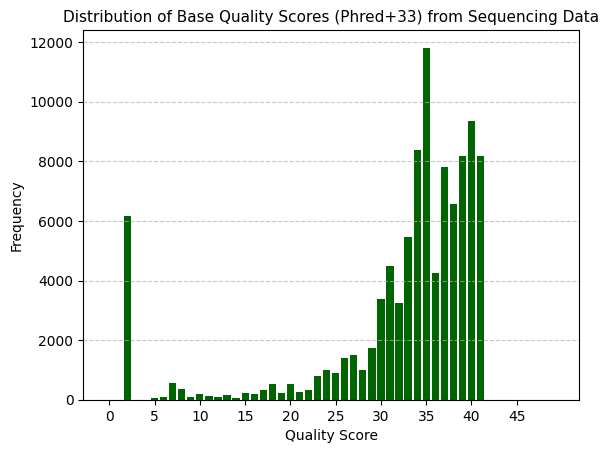

In [ ]:
import matplotlib.pyplot as plt


plt.bar(range(len(h)), h, color='darkgreen')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) # Grid lines
plt.xticks(range (0, len(h), 5)) # Show every 5th tick
plt.title('Distribution of Base Quality Scores (Phred+33) from Sequencing Data', fontsize = 11)
plt.show()   # distribution of quality score values


In [ ]:
# Analysis: note qual value of 2; base color not confident so low confidence is compounded there-after

##**Analyzing reads by position**

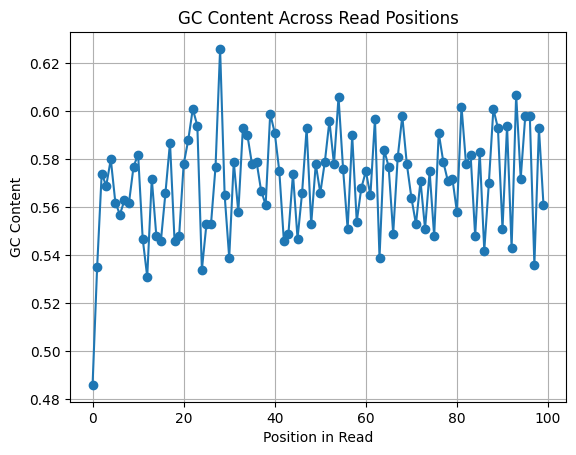

In [ ]:
# GC-content to confirm if mix of bases is changing as we move along the read; expected to stay the same/ be even
# Plot for entire read to identify anomolies


def find_gc_by_position(reads): #from strings of bases not quality scores
  gc = [0] * 100  # Track number of gc bases at each positions in the read; all reads are of 100 len so thats why *100
  totals = [0] * 100  # Track total number of bases at each position in the read; all reads are of 100 len so thats why *100

  for read in reads: # Loop through each read in set of reads
    for i in range(len(read)):  # Loop through each base
      if read[i] == 'C' or read[i] == 'G':
        gc[i] += 1
      totals[i] += 1

  for i in range(len(gc)): # divide gc by totals to get average gc content; loop through each base up to len of reads
    if totals[i] > 0:
      gc[i] /= float(totals[i])   # float to prevent trunkating integers

  return gc

gc = find_gc_by_position(seqs)
plt.plot(range(len(gc)), gc, marker='o')
plt.grid(True)
plt.xlabel('Position in Read')
plt.ylabel('GC Content')
plt.title('GC Content Across Read Positions')
plt.show()

In [ ]:
# Analysis: from L -> R consistent; fluctuations from noise; gc above 0.5

In [ ]:
#Distribution of bases in these sequences (collections)



import collections


count = collections.Counter()
for seq in seqs:
  count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [ ]:
# gc content above 0.5; 'N' = base color has NO confidence; (18) is pretty low therefore this is good to see


[('G', 28742), ('C', 28272), ('T', 21836), ('A', 21132), ('N', 18)]


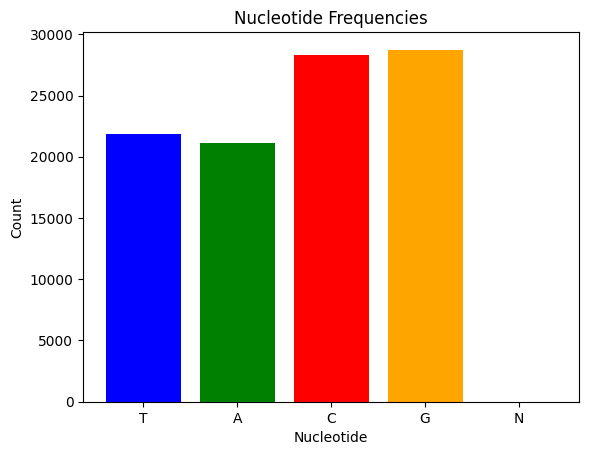

In [ ]:
#Plot Nulceotide Frequencies


sorted_counts = sorted(count.items(), key=lambda x: x[1], reverse=True)
print(sorted_counts)


labels, values = zip(*count.items())



plt.bar(labels, values, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Nucleotide')
plt.ylabel('Count')
plt.title('Nucleotide Frequencies')
plt.show()

In [ ]:
#differences despite assumed pairing due to biases in the sequencing process or inherent sequence composition

###**Exact Matching: Naiive algorithm**

In [ ]:
# In terms of x,y as P, T how many different alignments will we examine
y - x + 1

# Given len(x,y) what is the greatest number of comparisons possible? Max times itterate through loop?
x(y - x + 1)
#(i.e. aaaaaaaaaaaa)

# Least?
y - x + 1

#(i.e. abbbbbbbbbbb)

# Pattern P = 'AAA'
# Total T = 'AAATAA'



#**Practical**

##** Matching Artificial Reads**

In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2024-08-07 05:26:34--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.65.227.145, 18.65.227.121, 18.65.227.2, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.65.227.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2024-08-07 05:26:34 (956 MB/s) - ‘phix.fa’ saved [5528/5528]



In [ ]:
def read_genome(filepath):
  genome = ''
  with open(filepath) as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip()
  return genome

genome = read_genome('/content/phix.fa')

In [ ]:
def naive(p, t):
  occurrences = [] # track indeces where p matches t
  for i in range(len(t) - len(p) + 1):   #loop through every pos in 't' that 'p' could start
    match = True
    for j in range (len(p)):   # Compare every char of p against corresponding pos in t
      if not t[i+j] == p[j]:   # Comparing char & offset j w/in p to the char & offset i + j w/in t; accounts for being in i'th pos; offset b/c alignment trying & which char comparing
        match = False
        break
    if match:
      occurrences.append(i)
  return occurrences


In [ ]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive (p, t)

[0, 5, 9]

In [ ]:
t[9:11]

'AG'

In [ ]:
# Generate reads from random pos in given genome


import random
def generate_reads(genome, num_reads, read_len):
  """ Generate reads from random positions in the given genome"""

  reads = []
  for _ in range(num_reads):
    start = random.randint(0, len(genome)-read_len) - 1
    reads.append(genome[start : start + read_len])
  return reads

In [ ]:
reads = generate_reads(genome, 100, 100)

num_matched = 0
for r in reads:
  matches = naive(r, genome)   # List of indeces where 'r' matches genome
  if len(matches) > 0:
    num_matched += 1

print('%d / %d reads matched exactly:' % (num_matched, len(reads)))   # Print reads that match

100 / 100 reads matched exactly:


##**Matching Real Reads**

In [ ]:
# Seq errors, double stranded, &/or diffs in org & ref genome
#reverse_complemement

def reverse_complement(s):
  complement = {
    'A':'T',
    'T':'A',
    'G':'C',
    'C':'G',
    'N':'N'}
  t = ''
  for base in s:
    t = complement[base] + t
  return t




In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2024-08-07 06:11:01--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.65.227.179, 18.65.227.121, 18.65.227.2, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.65.227.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.03s   

2024-08-07 06:11:01 (9.56 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [ ]:
def read_fastq(filepath):
  sequences = []
  qualities = []
  with open(filepath) as fh: #fh is file handle
    while True: # read 4 lines at a time per file format
      fh.readline() # Tag; not needed so read but don't store to a variable
      seq = fh.readline().rstrip() # Save to variable seq
      fh.readline() # + symbol not needed so just read don't store to a variable
      qual = fh.readline().rstrip()
      if len(seq) == 0: # Check if you've reached end of file
        break

      sequences.append(seq) #if still reading lines, append values to list
      qualities.append(qual)
    return sequences, qualities



phix_reads, _ = read_fastq('/content/ERR266411_1.first1000.fastq')

In [ ]:
num_matched = 0
n = 0
for r in phix_reads:
  r = r[:40]
  matches = naive(r, genome)
  n += 1
  if len(matches) > 0:
    num_matched += 1
print('%d / %d reads matched the genome!' % (num_matched, n))

425 / 1000 reads matched the genome!


In [ ]:
num_matched = 0
n = 0
for r in phix_reads:
  r = r[:40]
  matches = naive(r, genome)
  matches.extend(naive(reverse_complement(r), genome))
  n += 1
  if len(matches) > 0:
    num_matched += 1
print('%d / %d reads matched the genome!' % (num_matched, n))

894 / 1000 reads matched the genome!


In [ ]:
# exact matching now ideal, account for seq errors

#**HW1:**


In [ ]:
# Seq errors, double stranded, &/or diffs in org & ref genome
#reverse_complemement

def reverse_complement(s):
  complement = {
    'A':'T',
    'T':'A',
    'G':'C',
    'C':'G',
    'N':'N'}
  t = ''
  for base in s:
    t = complement[base] + t
  return t

In [ ]:
def naive(p, t):
  occurrences = [] # track indeces where p matches t
  for i in range(len(t) - len(p) + 1):   #loop through every pos in 't' that 'p' could start
    match = True
    for j in range (len(p)):   # Compare every char of p against corresponding pos in t
      if not t[i+j] == p[j]:   # Comparing char & offset j w/in p to the char & offset i + j w/in t; accounts for being in i'th pos; offset b/c alignment trying & which char comparing
        match = False
        break
    if match:
      occurrences.append(i)
  return occurrences

In [ ]:
num_matched = 0
n = 0
for r in reads:
  r = r[:40]
  matches = naive(r, genome)
  matches.extend(naive(reverse_complement(r), genome))
  n += 1
  if len(matches) > 0:
    num_matched += 1
print('%d / %d reads matched the genome!' % (num_matched, n))

100 / 100 reads matched the genome!


In [ ]:
p = 'AGGT'
rcp = 'ACCT'

match_p = naive(p,genome)
print("Occurrences: ", len(match_p))

match_rcp =  naive(rcp, genome)
print("Reverse Complement Occurrences: ", len(match_rcp))
total_occurrences = len(match_p) + len(match_rcp)
print("Total Occurrences: ", total_occurrences)

Occurrences:  150
Reverse Complement Occurrences:  156
Total Occurrences:  306


In [ ]:
p = 'TTAA'
rcp = 'AATT'

match_p = naive(p,genome)
print("Occurrences: ", len(match_p))

match_rcp =  naive(rcp, genome)
print("Reverse Complement Occurrences: ", len(match_rcp))
total_occurrences = len(match_p) + len(match_rcp)
print("Total Occurrences: ", total_occurrences)

Occurrences:  195
Reverse Complement Occurrences:  189
Total Occurrences:  384


In [ ]:
p = 'ACTAAGT'
rcp = reverse_complement(p)

matched_p = naive(p,genome)
print("Occurrences of p: ", matched_p)
matched_rcp = naive(rcp, genome)
print("Occurrences of rcp: ", matched_rcp)



Occurrences of p:  [27733, 45382]
Occurrences of rcp:  [26028]


In [ ]:
p = 'AGTCGA'
rcp = reverse_complement(p)

matched_p = naive(p,genome)
print("Occurrences of p: ", matched_p)
matched_rcp = naive(rcp, genome)
print("Occurrences of rcp: ", matched_rcp)

Occurrences of p:  [18005, 23320, 33657, 44806]
Occurrences of rcp:  [450, 1908, 2472, 41927, 45369]


In [ ]:
# Matched occurrences allowing 2 mismatches


def naive_2mm(p, t):
  occurrences = [] # track indeces where p matches t
  for i in range(len(t) - len(p) + 1):   #loop through every pos in 't' that 'p' could start

    mismatches = 0
    for j in range (len(p)):   # Compare every char of p against corresponding pos in t
      if not t[i+j] == p[j]:   # Comparing char & offset j w/in p to the char & offset i + j w/in t; accounts for being in i'th pos; offset b/c alignment trying & which char comparing
        mismatches += 1
        if mismatches > 2:
          break
    if mismatches <= 2:
      occurrences.append(i)
  return occurrences


In [ ]:
p = 'TTCAAGCC'

matches = naive_2mm(p, genome)

print("Number of Occurences, allowing 2 mismatches: ", len(matches))

Number of Occurences, allowing 2 mismatches:  191


In [ ]:
p = 'AGGAGGTT'

matches = naive_2mm(p, genome)

print("Number of Occurences, allowing 2 mismatches: ", len(matches))

Number of Occurences, allowing 2 mismatches:  215


In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2024-08-07 17:35:14--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.35.37.49, 13.35.37.173, 13.35.37.71, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.35.37.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K   276KB/s    in 0.2s    

2024-08-07 17:35:15 (276 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [ ]:
def read_genome(filepath):
  genome = ''
  with open(filepath) as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip()
  return genome

genome = read_genome('/content/lambda_virus.fa')

genome = read_genome('/content/lambda_virus.fa')
genome_length = len(genome)
print("Length of genome: ", genome_length)
genome[:100] #1st 100 bases of genome

Length of genome:  48502


'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [ ]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2024-08-07 18:59:00--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.35.37.198, 13.35.37.173, 13.35.37.49, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.35.37.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   449KB/s    in 0.5s    

2024-08-07 18:59:02 (449 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [ ]:
#FASTQ format:
#Name
#Sequence
#+ (ignore)
#Base qualities (ASCII encoded value of Q = -10log10^p)



# Phred33:
# Base quality 'Q' value -> corresponding character
# Round 'Q' to nearest integer, add (33), match (#) to ASCII designated characters


def QtoPhred33(Q):
  """Turn Q into Phred+33 ASCII-encoded quality"""
  return chr(Q + 33)


def phred33ToQ(character):
  "Turn Phred+33 ASCII encoded quality into Q"""
  return ord(character)-33

In [ ]:
def read_fastq(filepath):
  sequences = []
  qualities = []
  with open(filepath) as fh: #fh is file handle
    while True: # read 4 lines at a time per file format
      fh.readline() # Tag; not needed so read but don't store to a variable
      seq = fh.readline().rstrip() # Save to variable seq
      fh.readline() # + symbol not needed so just read don't store to a variable
      qual = fh.readline().rstrip()
      if len(seq) == 0: # Check if you've reached end of file
        break

      sequences.append(seq) #if still reading lines, append values to list
      qualities.append(qual)
    return sequences, qualities



seqs, quals = read_fastq('/content/ERR037900_1.first1000.fastq')

In [ ]:
def create_hist(qualities):   # define function for what we want to do, using
  hist = [0] * 50   # freq of qual. score seen; range for score ~41; 50 for cushion
  for qual in qualities:   # for each string of quality values in our list 'qualities'
    for phred in qual:    # look through quality scores 'phred' in each string 'qual'
      q = phred33ToQ(phred)   # convert to a number by calling phred function
      hist[q] += 1    # increment value q in histogram
  return hist

h = create_hist(quals)
print(h) #histogram values

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


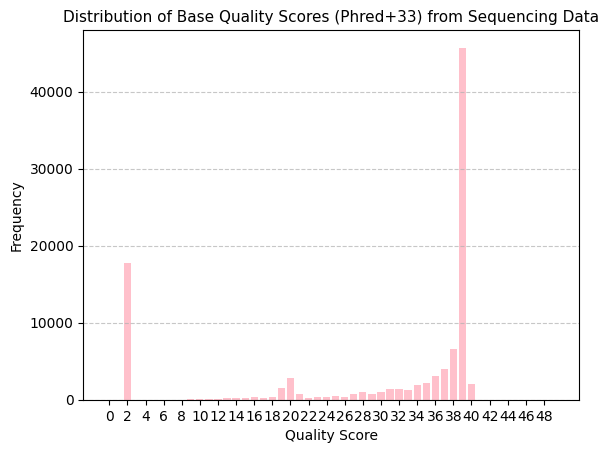

In [ ]:
import matplotlib.pyplot as plt


plt.bar(range(len(h)), h, color='pink')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) # Grid lines
plt.xticks(range (0, len(h), 2)) # Show every 5th tick
plt.title('Distribution of Base Quality Scores (Phred+33) from Sequencing Data', fontsize = 11)
plt.show()   # distribution of quality score values